# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Project One (Foodhub)/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.


*   rating represents the rating given to the restaurant, with some missing values (indicated as "Not Given").
*   The dataset includes orders from different restaurants offering diverse cuisines
*   The order_id column appears to be a unique identifier for each order.
*   customer_id represents the unique identifier for each customer placing the order.
*   There are mix of numerical and categorical columns.






### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
print("Number of raws and columns are ", df.shape)

Number of raws and columns are  (1898, 9)


#### Observations:
The data set has **1898** number of rows with **9** columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are 5 numerical columns and 4 columns with string data type
*   customer_id should be also considered as string which need to be modified
*   **Rating** should be integer, however, it has been identified as object which should be modified.
*   It provides the non-null count for each column, indicating missing values, there is no missing values. All the columns **1898** observations which means non of the columns have null values.
*   The object type columns contain categories in them
*   The memory usage is also displayed.
* Cost of the order is float







### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
df.isnull().sum() # checking for missing value

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [7]:
df.drop('order_id', axis=1, inplace=True) # Removing "order_id" column to ease the data analysis

In [8]:
# converting "customer_id" to string
df['customer_id'] = df['customer_id'].astype(str) #converting "customer_id" to string

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            1898 non-null   object 
 1   restaurant_name        1898 non-null   object 
 2   cuisine_type           1898 non-null   object 
 3   cost_of_the_order      1898 non-null   float64
 4   day_of_the_week        1898 non-null   object 
 5   rating                 1898 non-null   object 
 6   food_preparation_time  1898 non-null   int64  
 7   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 118.8+ KB


#### Observations:

*   From the information above there is **no** missing data in any columns. Just **rating** column has **not** been rated by some customers.
*   **order_id** column was droped to ease the analysis.
*   Then "**rating**" column was changed from **string** into **integer** and also "**Not given**" was changed into **NA** (not defined)
*   **Customer_id** culumn has been changed to string type
*   Only one float type and that is **cost of the order**










### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:


*   minimum time it takes to prepare the food is : 20 minutes
*   maximum time it takes to prepare the food is : 35 minutes
*   average time it takes to prepare the food is : 27.37197 minutes(approximately 27 minutes)
*   The average cost of an order is around 16.50 Dollars.
*   The orders vary from a minimum cost of 4.47 Dollars to a maximum of 35.41 Dollars.
*   The majority of orders (75%) have a cost below $22.30.
*   The average food preparation time is around 27.37 units.
*   The preparation time varies from a minimum of 20 units to a maximum of 35 units.
*   The majority of orders (50% to 75%) have a preparation time between 27 and 31
*   The average delivery time is approximately 24.16 units.
*   Delivery times range from a minimum of 15 units to a maximum of 33 units.
*   The majority of orders (50% to 75%) have a delivery time between 25 and 28 units.




### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

**736** Orders have not recieved any ratings

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

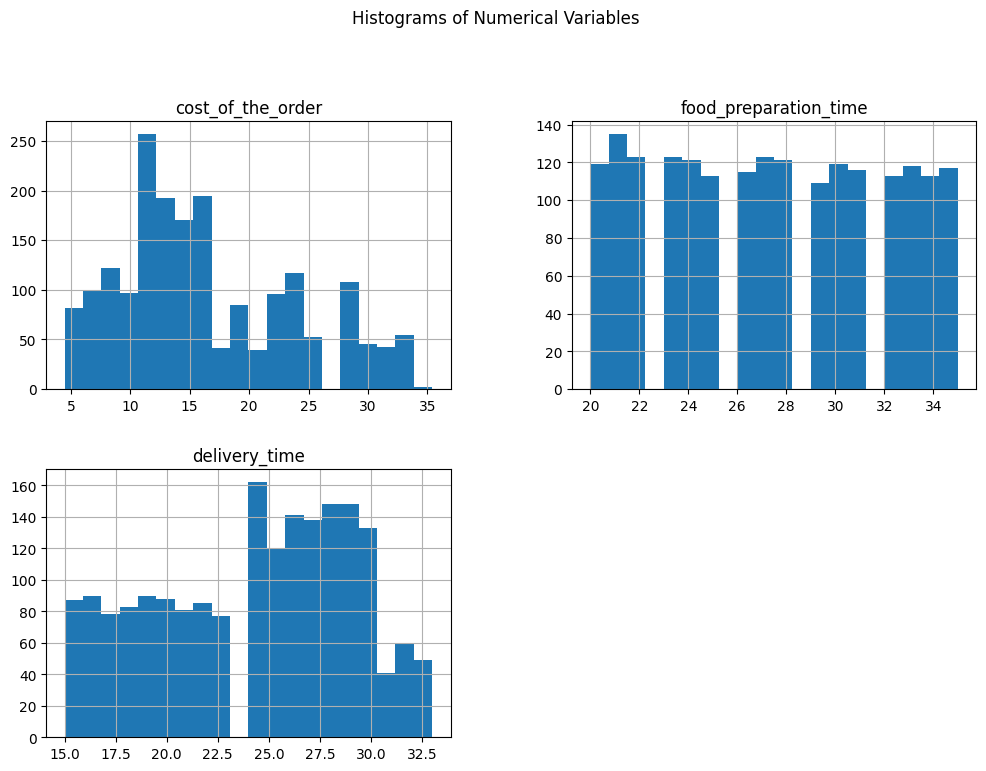

In [12]:
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
df[numerical_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()

####Observation on numerical columns

*   Most of the orders cost just over 10 Dollars
*   Some of the orders do stretch over 30 dollars.
*   The preparation time for food varies, falling within the range of 20 to approximately 35 minutes.
*   The delivery time spans from 15 minutes to around 33 minutes, suggesting that certain restaurants extend their delivery services to broader areas within the town.
*   The majority of deliveries are completed within 25 minutes and beyond.











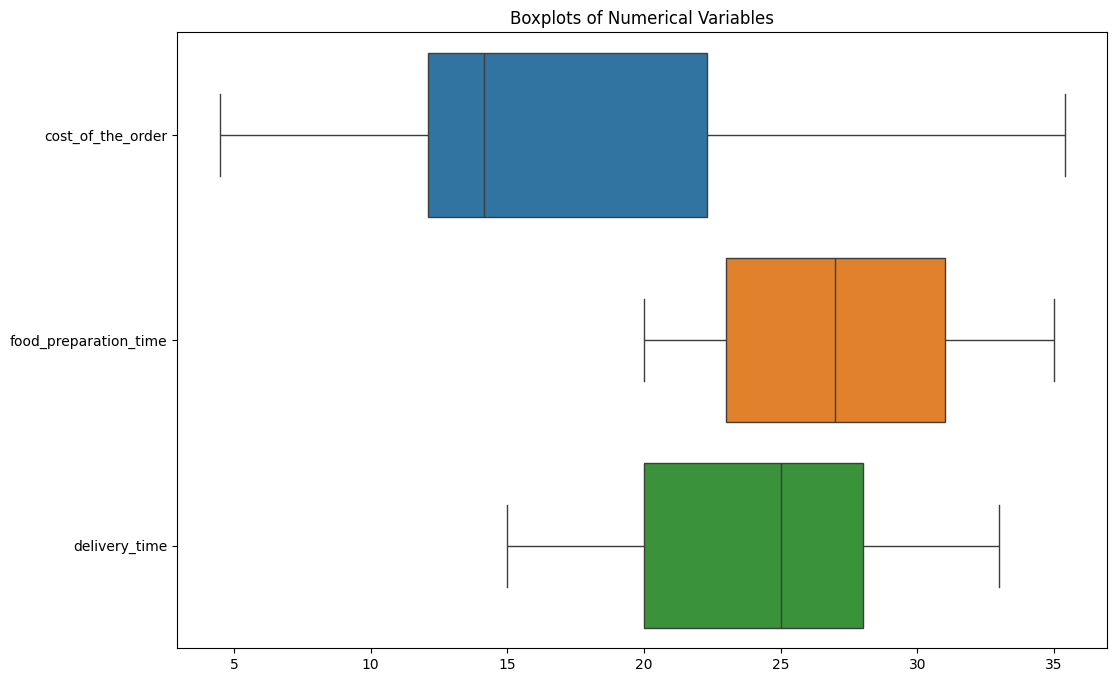

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Variables')
plt.show()

####Observation on numerical columns

*   50% of delivery times extend to 25 minutes and beyond.
*   There are no outliers
*   Half of the order costs exceed $14.

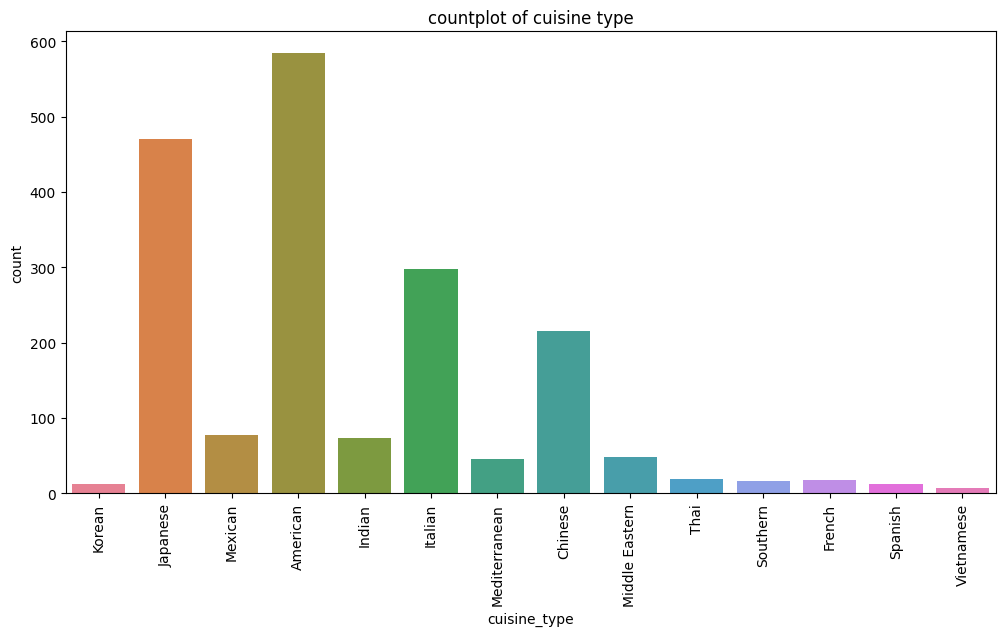

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="cuisine_type", hue='cuisine_type')
plt.title("countplot of cuisine type")
plt.xticks(rotation=90)
plt.show()

#### Observation cuisine

*   American cuisine is the most popular among other cuisines.
*   Following that, in descending order, are Japanese, Italian, and Chinese cuisines, respectively.
*   Vietnamese cuisine is the least popular among other cuisines.



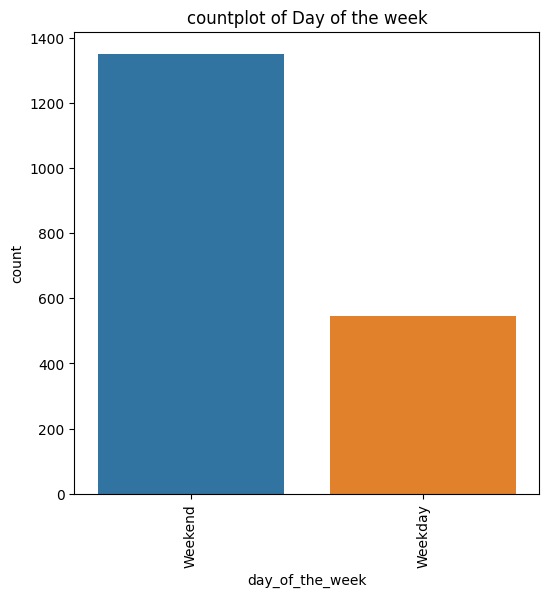

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.title("countplot of Day of the week")
plt.xticks(rotation=90)
plt.show()

#### Observation on day of the week

*   The number of orders placed during the weekend is more than double the number of orders placed during the weekdays.
*   More than 1300 orders were placed during the weekends




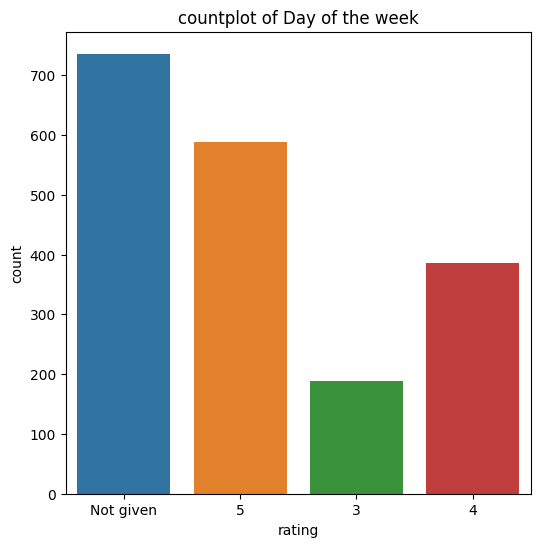

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='rating', hue='rating')
plt.title("countplot of Day of the week")
plt.show()

#### Observation on rating

*   It shows that a lot of customers did not provide any rating at all in comparison to other rating levels




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


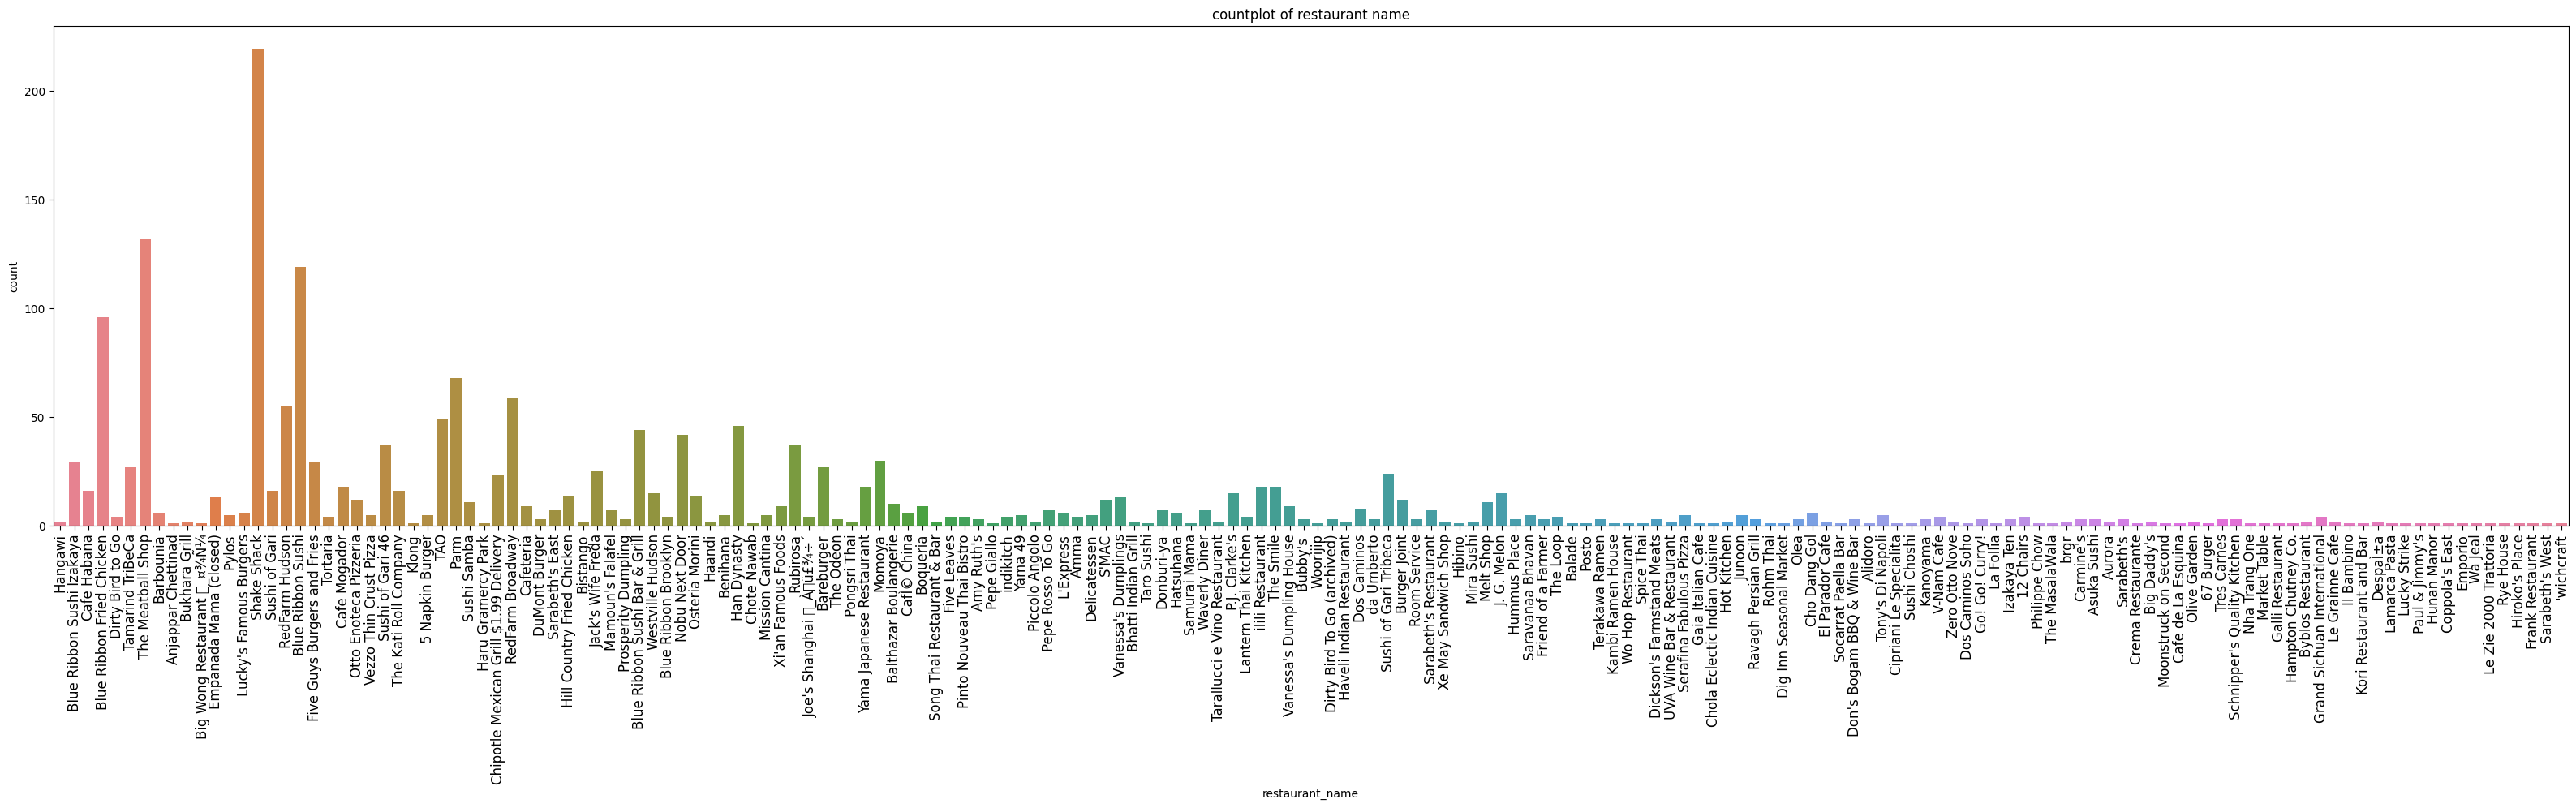

In [17]:
plt.figure(figsize=(40, 8))
sns.countplot(data=df, x='restaurant_name', hue='restaurant_name');
plt.title("countplot of restaurant name")
plt.xticks(rotation=90, fontsize=12)
plt.show()

#### Observation on restaurant name

*   Shake Shack has the highest number of orders with more than 200 orders
*   There are many restaurants with few number of orders
*   The Meatball Shop owns the second place in terms of number of order





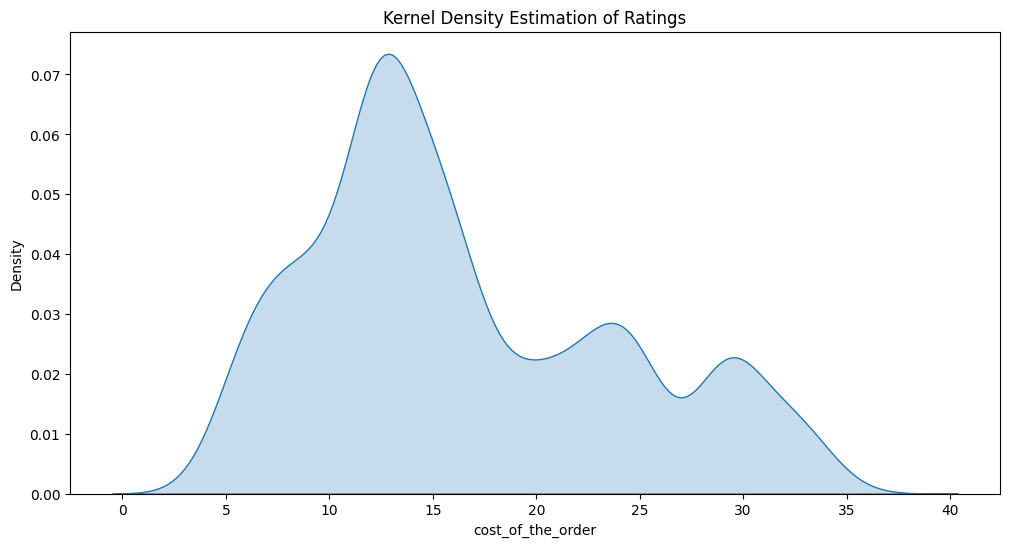

In [18]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['cost_of_the_order'], fill=True)
plt.title('Kernel Density Estimation of Ratings')
plt.show()

#### Observation cost of the order


*   The above plot indicates that the majority of orders fall within the price range of 10 to 15 Dollars.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(f"The top 5 restaurants in terms of number of orders received are:\n{top_restaurants}")

The top 5 restaurants in terms of number of orders received are:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:

*   Shake shack is the most frequently occurring restaurant with 219 orders recieved.
*   Then on decending order is The meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and parm, with 132, 119, 96 and 68 orders respectively.




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
pop_cuisine = df[df['day_of_the_week'] == 'Weekend']
pop_cuisine["cuisine_type"].value_counts().head()
print(f"The most popular cuisine on weekends is:\n{pop_cuisine['cuisine_type'].value_counts().head()}")

The most popular cuisine on weekends is:
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


#### Observations:



*   American cuisine is the most popular at the weekends with 415 Orders.
*   Then on decending order is Japanese and Italian and Chinese with 335, 207, 163 orders at the weekends respectively.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (len(orders_above_20) / len(df)) * 100
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:

*   29.24% of orders cost more than $20  
*   Just over 70% of orders are under 20 Dollars.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
df["delivery_time"].mean()
print(f"The average time to deliver food: {df['delivery_time'].mean():.2f} minutes")

The average time to deliver food: 24.16 minutes


#### Observations:
The average time to deliver food is 24 minutes and 16 seconds

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
df["customer_id"].value_counts().head(3)
print(f"The top 3 most frequent customers are:\n{df['customer_id'].value_counts().head(3).to_string()}")

The top 3 most frequent customers are:
52832    13
47440    10
83287     9


#### Observations:
The top 3 most frequent customers are:
*   Customer with ID number as 52832 has placed 13 orders in total.
*   Customer with ID number as 47440 has placed 10 orders in total.
*   Customer with ID number as 83287 has placed 9 orders in total.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


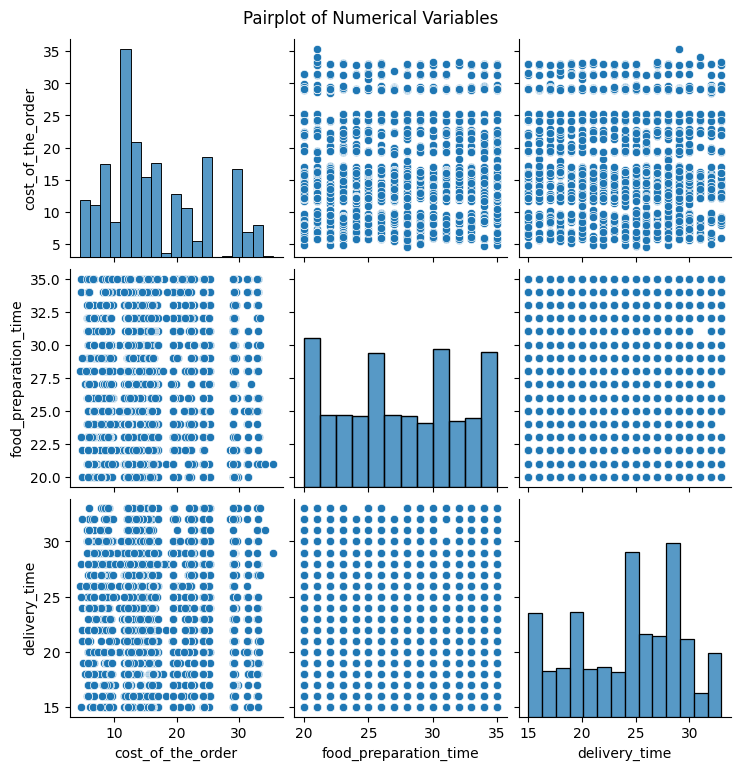

In [24]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

#### Observation on pairplot

*   There is minimal evidence of a robust connection between these data, and any noticeable correlation is lacking.



<ipython-input-25-2ca1215a85b8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='price_point', y='rating', data=df, jitter=True, palette='viridis', size=8, alpha=0.7)


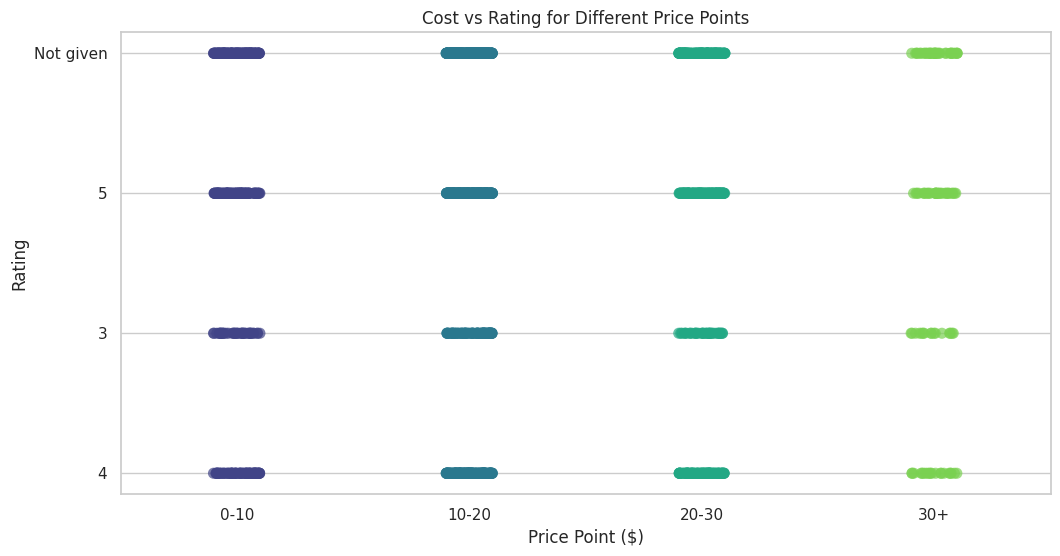

In [25]:
df['price_point'] = pd.cut(df['cost_of_the_order'], bins=[0, 10, 20, 30, float('inf')],
                           labels=['0-10', '10-20', '20-30', '30+'], right=False)
# Set the style of seaborn
sns.set(style="whitegrid")
# Create a categorical scatter plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='price_point', y='rating', data=df, jitter=True, palette='viridis', size=8, alpha=0.7)
plt.title('Cost vs Rating for Different Price Points')
plt.xlabel('Price Point ($)')
plt.ylabel('Rating')
plt.show()

#### Observation:
* The presented plot suggests that various price points correspond to different ratings. Consequently, drawing a definitive conclusion regarding whether lower or higher price points lead to lower ratings is challenging.

<ipython-input-26-2b2bf287446e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='delivery_time_point', y='rating', data=df, jitter=True, palette='viridis', size=8, alpha=0.7)


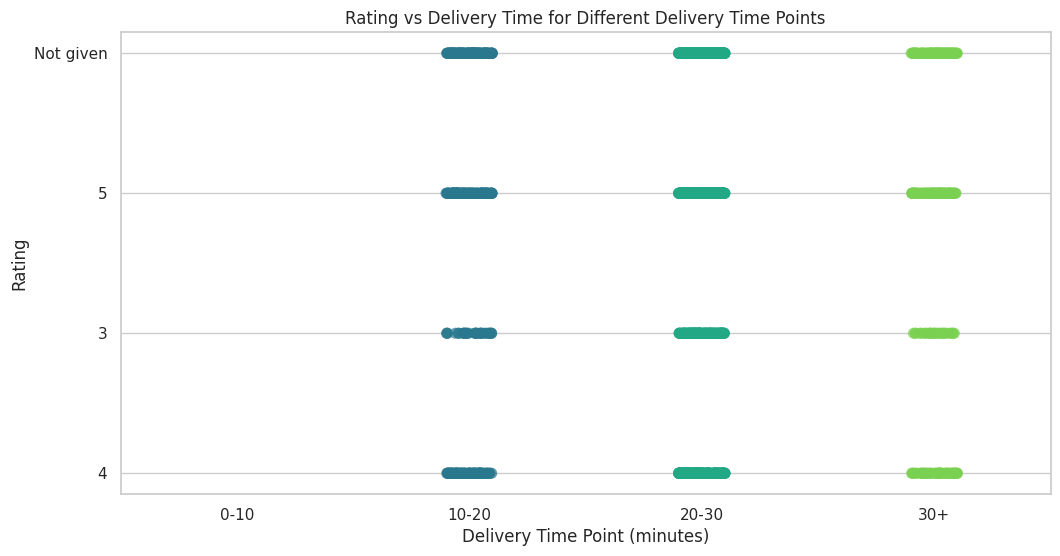

In [26]:
df['delivery_time_point'] = pd.cut(df['delivery_time'], bins=[0, 10, 20, 30, float('inf')],
                                   labels=['0-10', '10-20', '20-30', '30+'], right=False)
# Set the style of seaborn
sns.set(style="whitegrid")
# Create a categorical scatter plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='delivery_time_point', y='rating', data=df, jitter=True, palette='viridis', size=8, alpha=0.7)
plt.title('Rating vs Delivery Time for Different Delivery Time Points')
plt.xlabel('Delivery Time Point (minutes)')
plt.ylabel('Rating')
plt.show()

#### Observation:
* The presented plot suggests that various Delivery Time points correspond to different ratings. Consequently, drawing a definitive conclusion regarding whether lower or higher Delivery Time points lead to lower ratings is challenging.

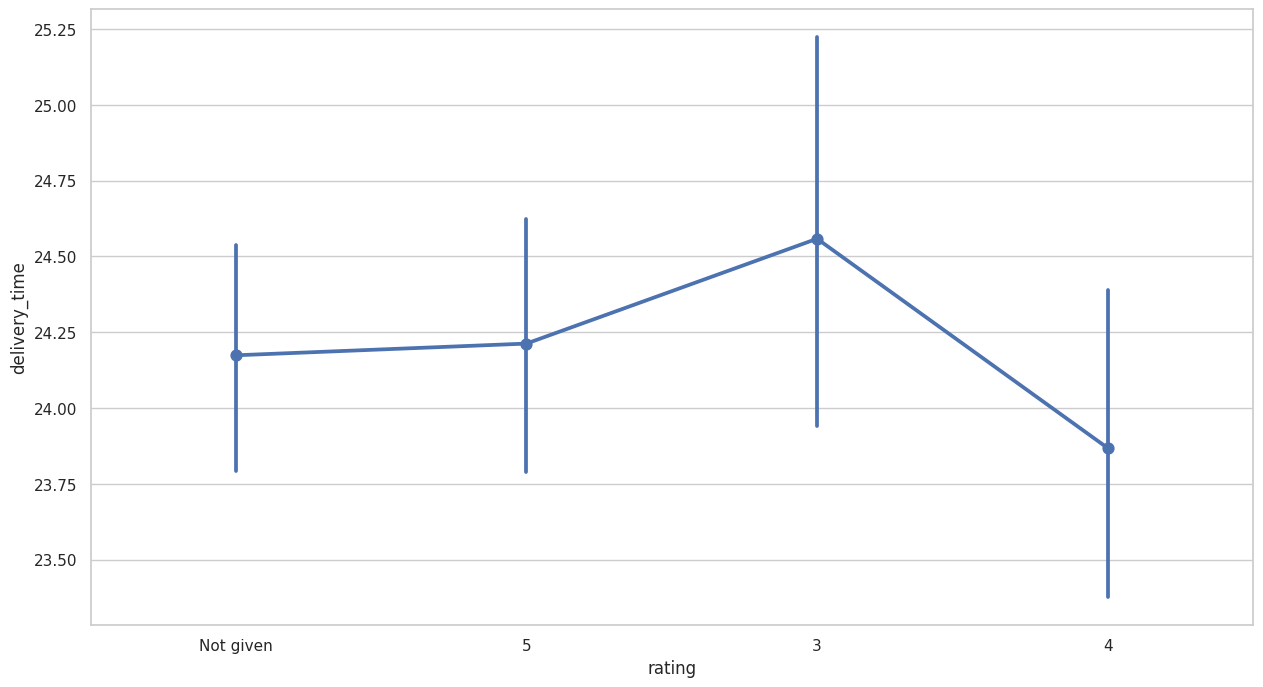

In [27]:
plt.figure(figsize=(15, 8))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observation on delivery time vs rating

*   The presented plot suggests an inverse relationship, indicating that longer delivery times are associated with lower ratings.





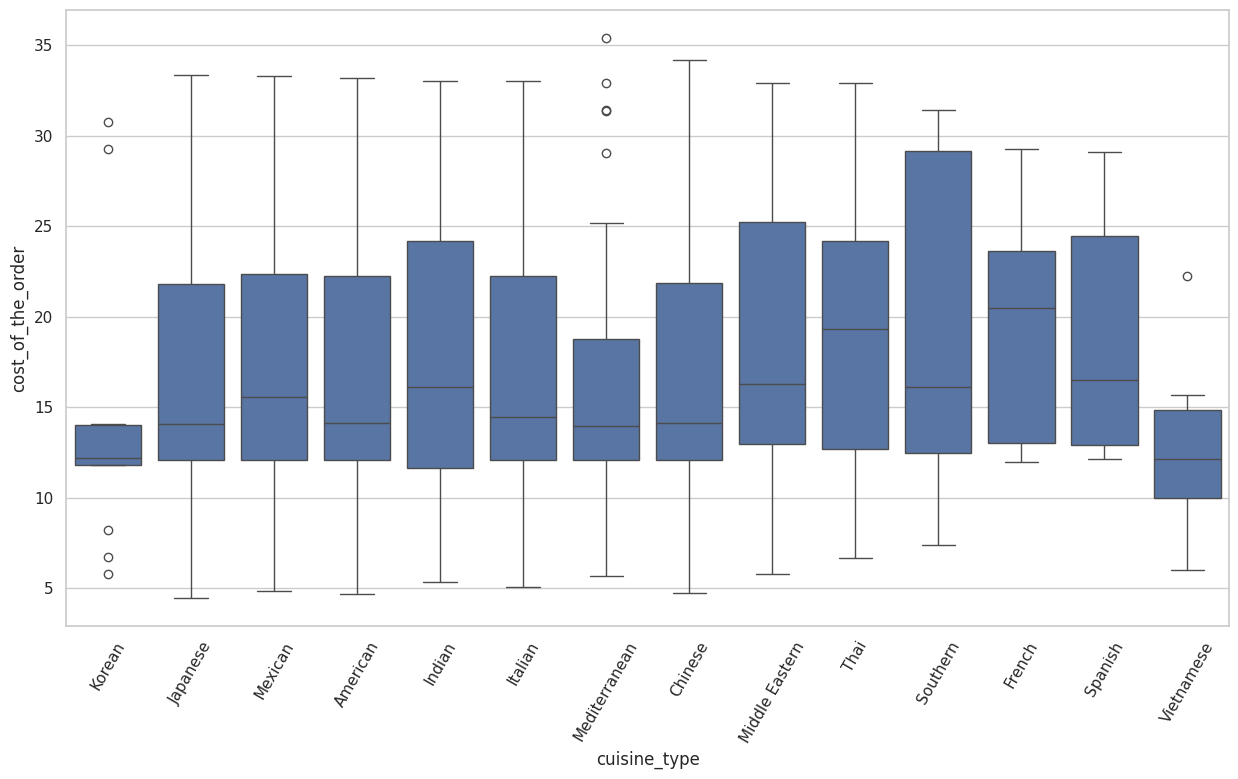

In [28]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,8))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

#### Observation on cost of the order vs cuisine type
* The cost of the order varies significantly across different cuisine types.
* Korean, Mediterranean, and Vietnamese cuisine exhibit outliers in the distribution of the cost of orders.
* Chinese cuisine has the widest range of prices among the various cuisine types.
* French cuisine, on average, has the highest mean costs compared to the other cuisines.

#### Observation on rating vs day of the week

*   The ratings exhibit consistency both on weekends and weekdays.
*   This indicates that the day of the week has no discernible impact on the overall rating.



<Figure size 1200x800 with 0 Axes>

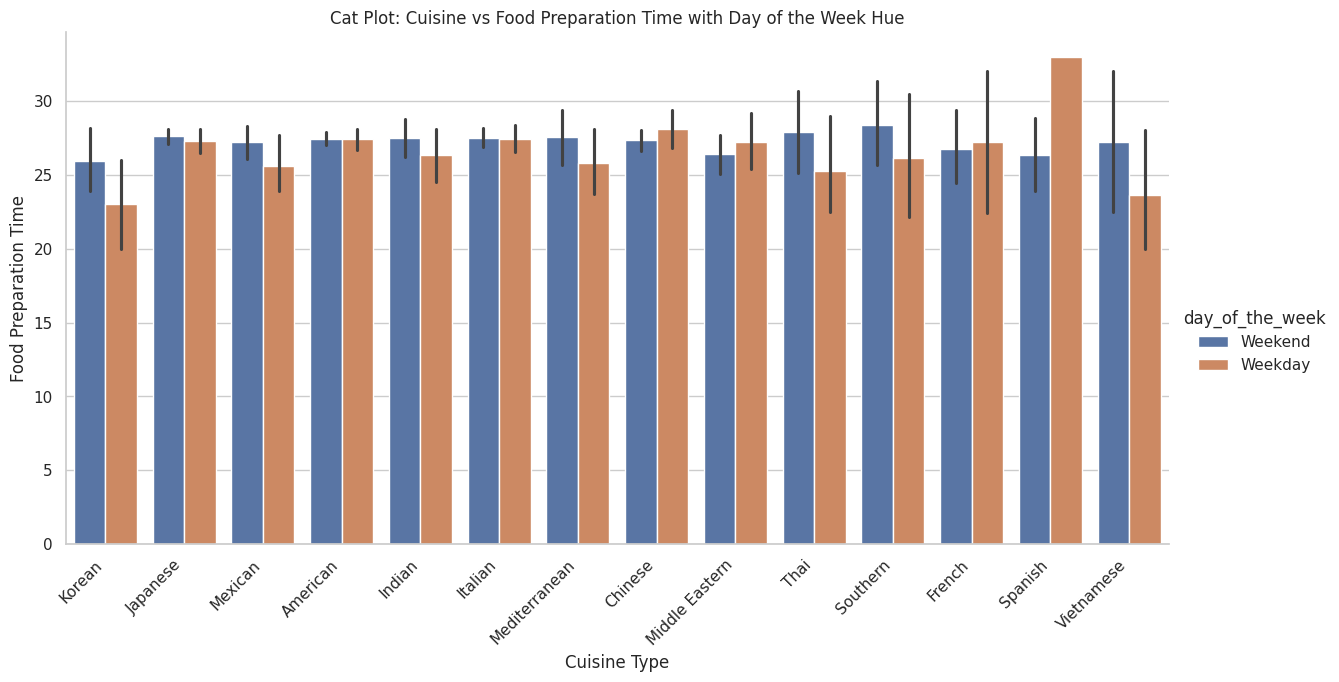

In [29]:
plt.figure(figsize=(12, 8))
sns.catplot(x='cuisine_type', y='food_preparation_time', hue='day_of_the_week', data=df, kind='bar', height=6, aspect=2)
plt.title('Cat Plot: Cuisine vs Food Preparation Time with Day of the Week Hue')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observation on food preparation time vs cuisine type

*   Spanish cuisine requires more preparation time on weekdays, while Korean and Vietnamese cuisine takes longer to prepare on weekends.
*   Japanese, American, and Italian cuisine show almost no variation in preparation time between weekends and weekdays.



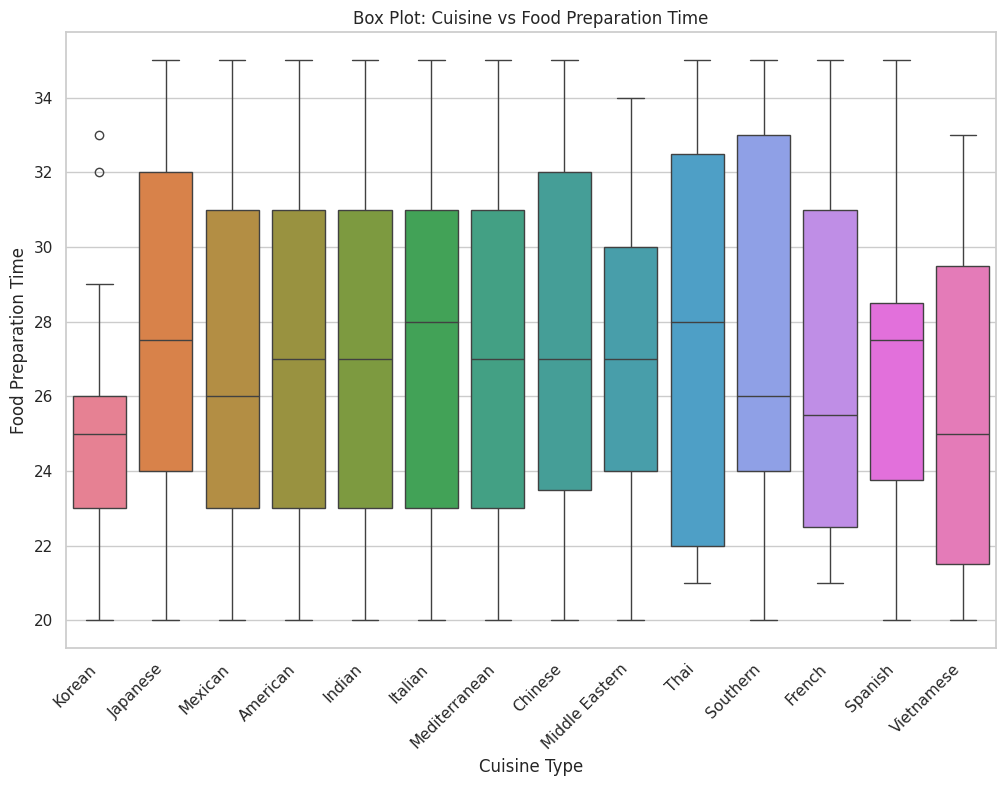

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, hue='cuisine_type')
plt.title('Box Plot: Cuisine vs Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observation on food preparation time vs Cuisine type

*   Korean and Vietnamese cuisine have the shortest preparation time.
*   Notably, Korean cuisine exhibits two outliers with preparation times of 32 and 33 minutes.



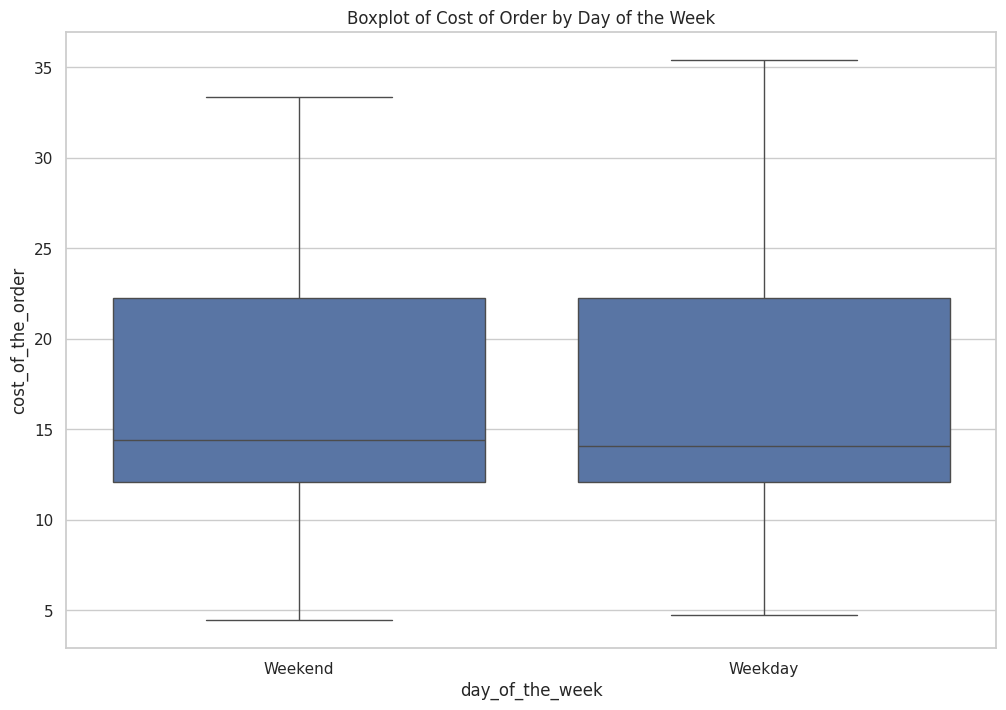

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title("Boxplot of Cost of Order by Day of the Week")
plt.show()

#### Observation on cost of the order vs day of the week

*   This indicates that the cost of the order remains consistent both during the week and on weekends.



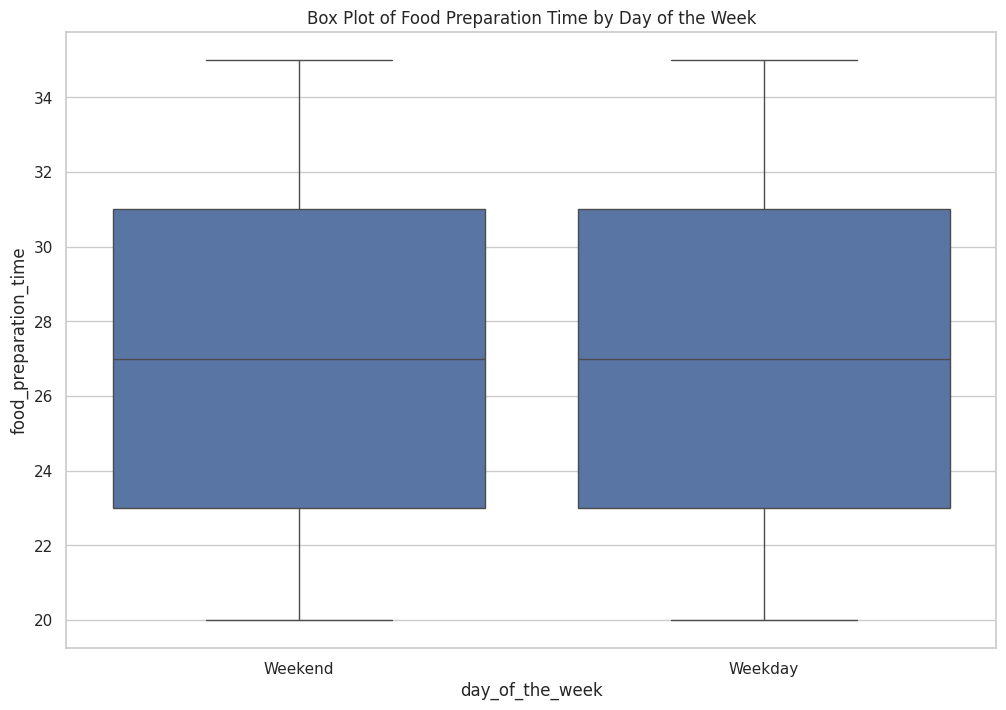

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Box Plot of Food Preparation Time by Day of the Week')
plt.show()

#### Observation on food preparation time vs day of the week

*   There is also no difference in food preparation time between weekdays and weekends.




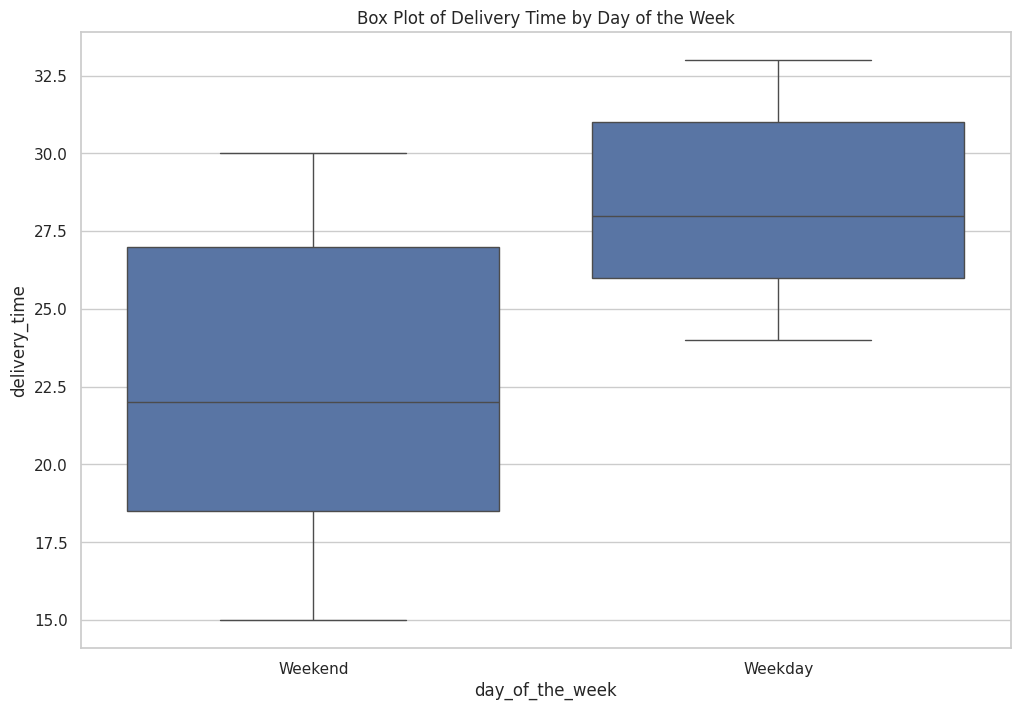

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Box Plot of Delivery Time by Day of the Week')
plt.show()

#### Observation on delivery time vs day of the week

*   On weekdays, the delivery time is longer compared to weekends.
*   Additionally, the data indicates that over 50% of deliveries during weekdays require more than 28 minutes.


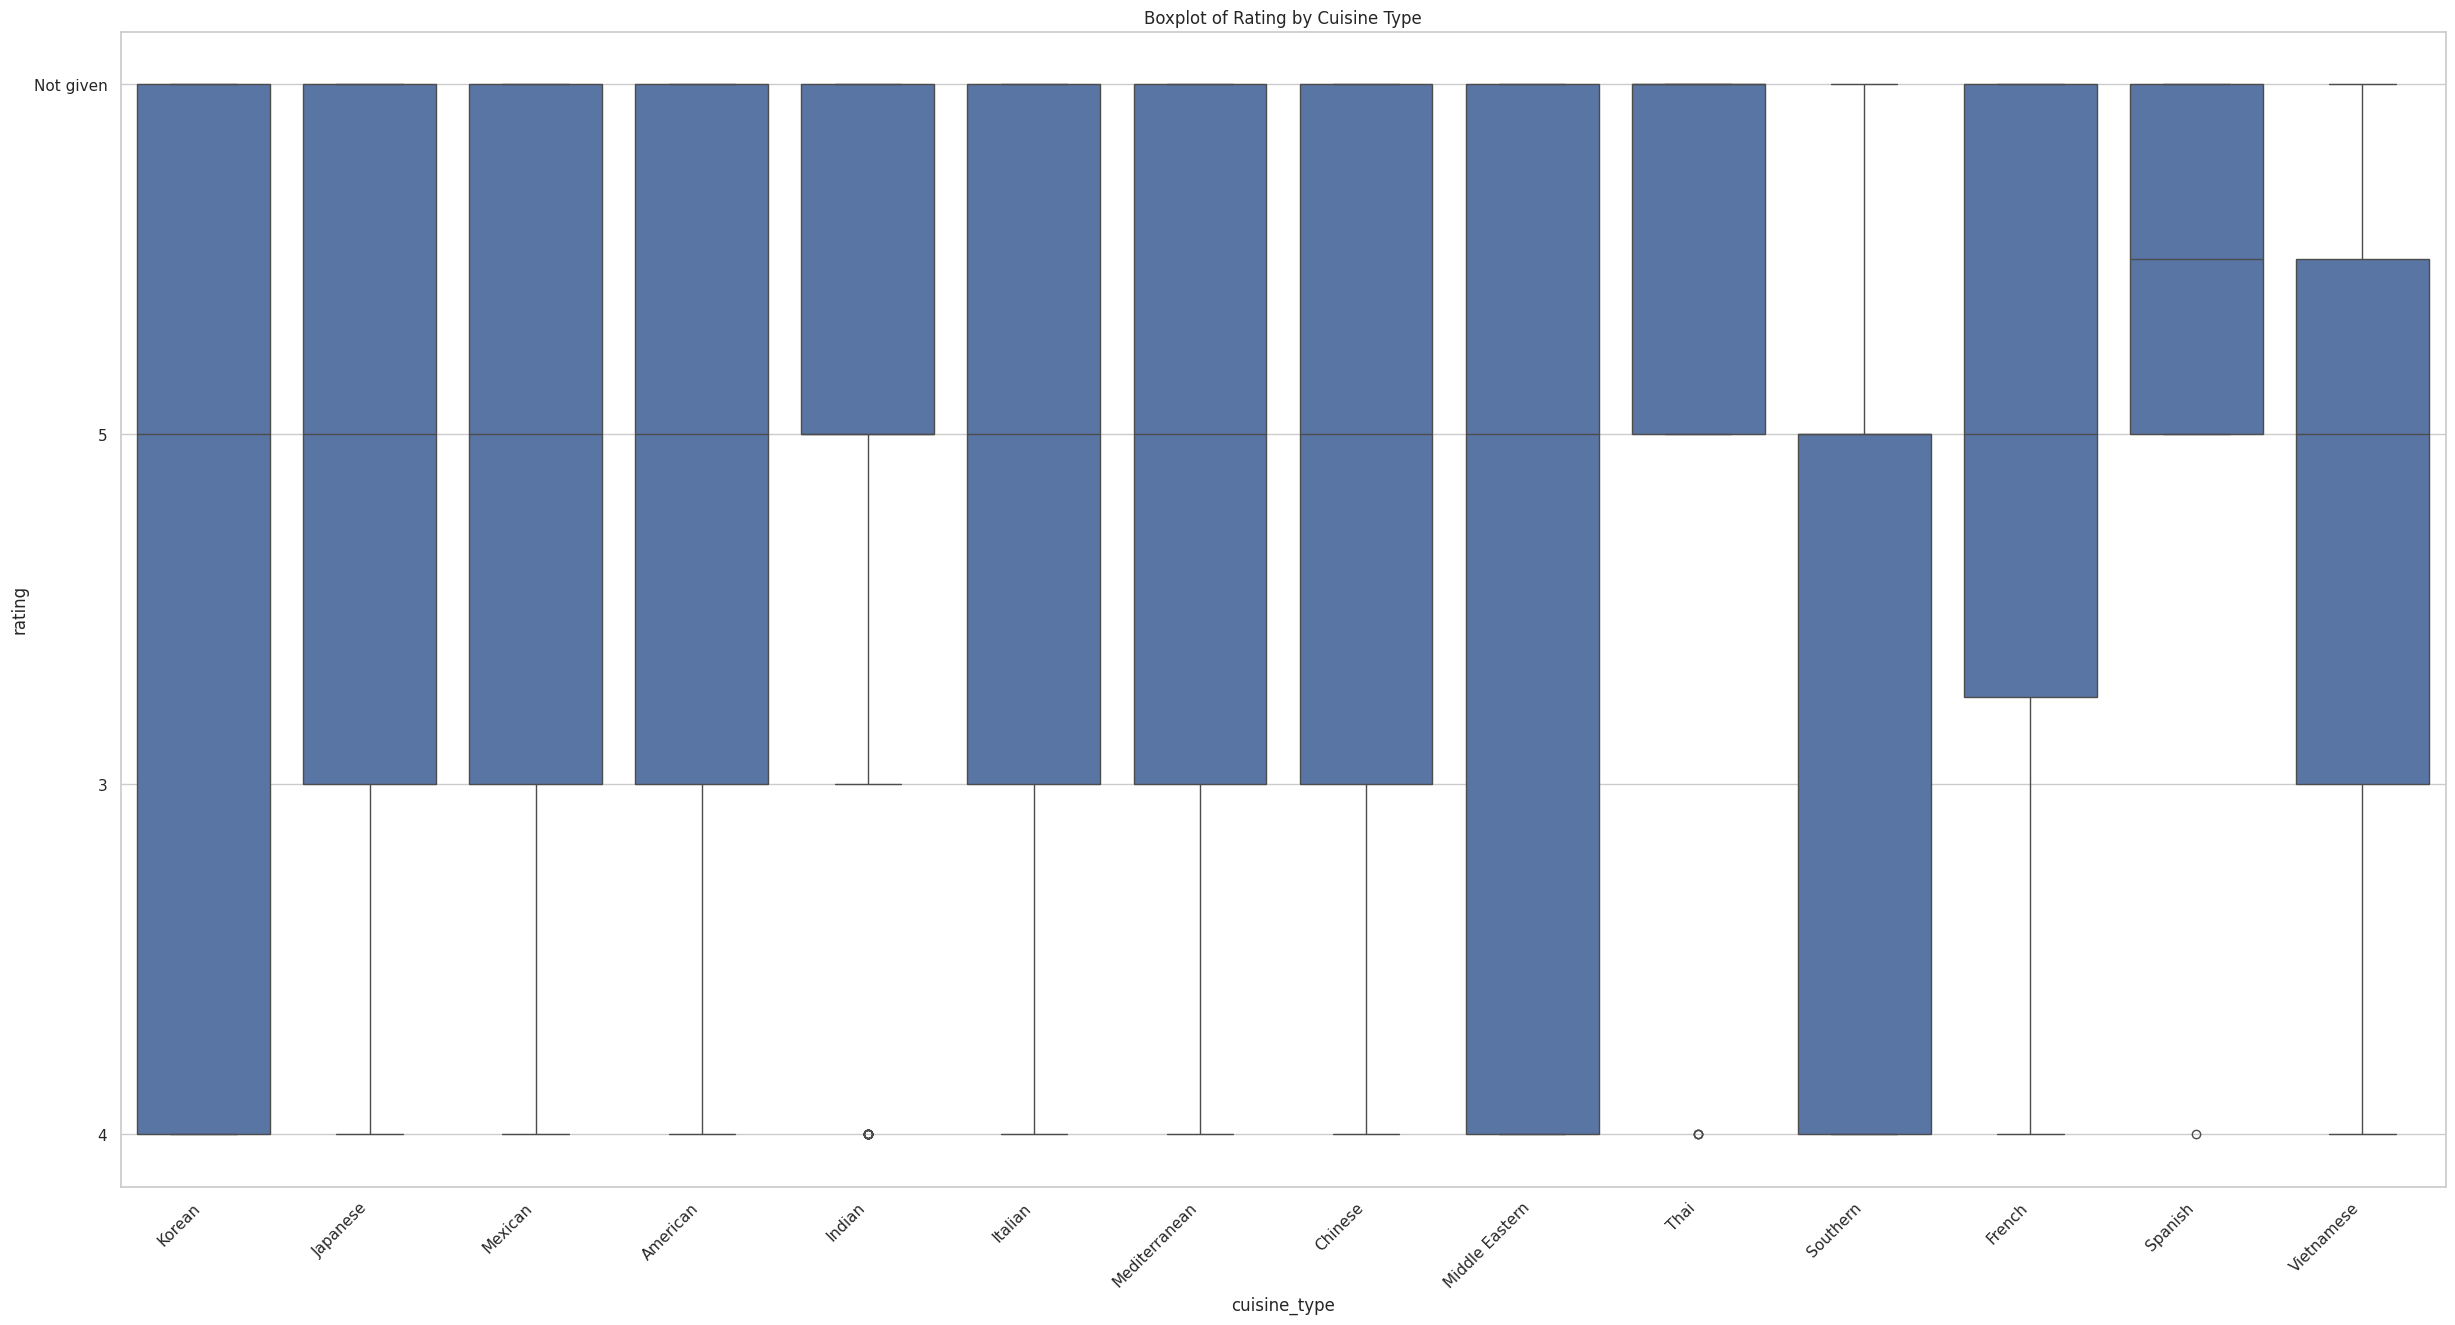

In [34]:
plt.figure(figsize=(30, 15))
sns.boxplot(x='cuisine_type', y='rating', data=df)
plt.title("Boxplot of Rating by Cuisine Type")
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observation on rating vs cuisine type

*   Mediterranean & Vietnamese cusine show no whisker which mean the data is symmetrically distributed
*   In Spanish cuisine, there is a single outlier with a rating of 4, while the remaining ratings are all 5. This observation might indicate either a lack of popularity or a limited variety of Spanish cuisine types.



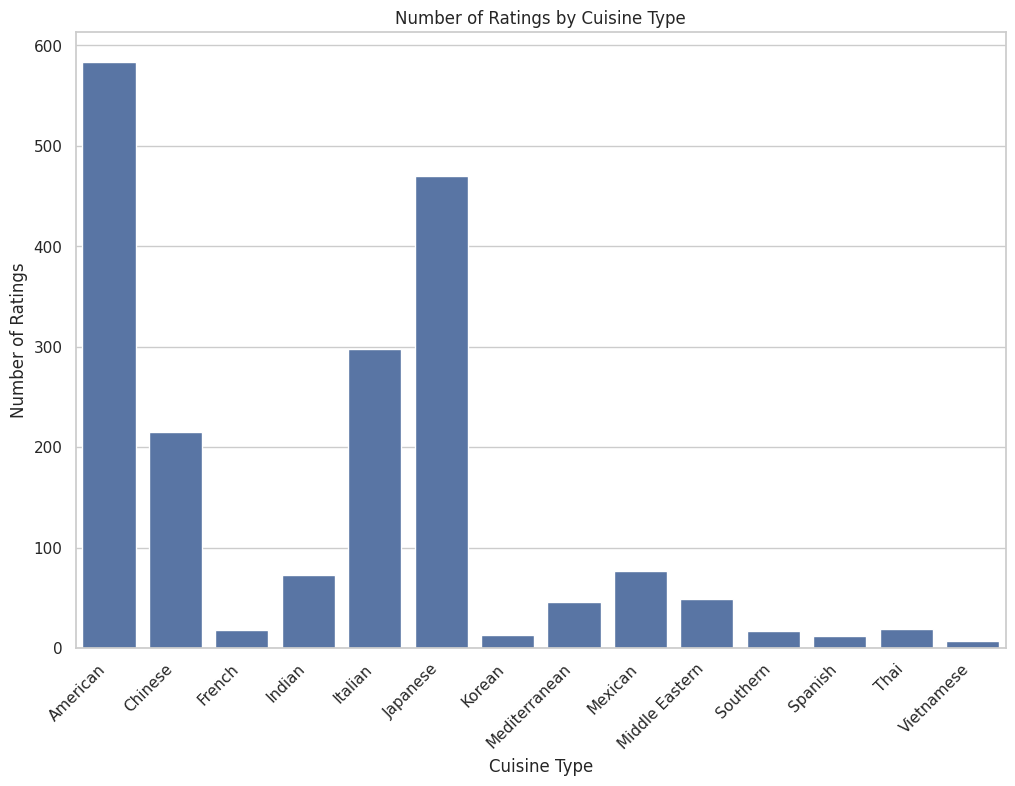

In [35]:
ratings_by_cuisine = df.groupby('cuisine_type')['rating'].count().reset_index(name='number_of_ratings')
plt.figure(figsize=(12, 8))
sns.barplot(x='cuisine_type', y='number_of_ratings', data=ratings_by_cuisine)
plt.title('Number of Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observations on Number of ratings vs Cuisine type


*   This illustrates the most popular cuisine in New York, with American cuisine leading with the highest number of ratings.
*   Following closely are Japanese, Italian, and Chinese cuisines, which also boast a significant number of ratings.



In [36]:
# Create a new column 'total_time' by adding 'delivery_time' and 'food_preparation_time'
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
df.head()

,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,price_point,delivery_time_point,total_time
0,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,30+,20-30,45
1,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,10-20,20-30,48
2,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,10-20,20-30,51
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,20-30,10-20,40
4,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,10-20,20-30,49


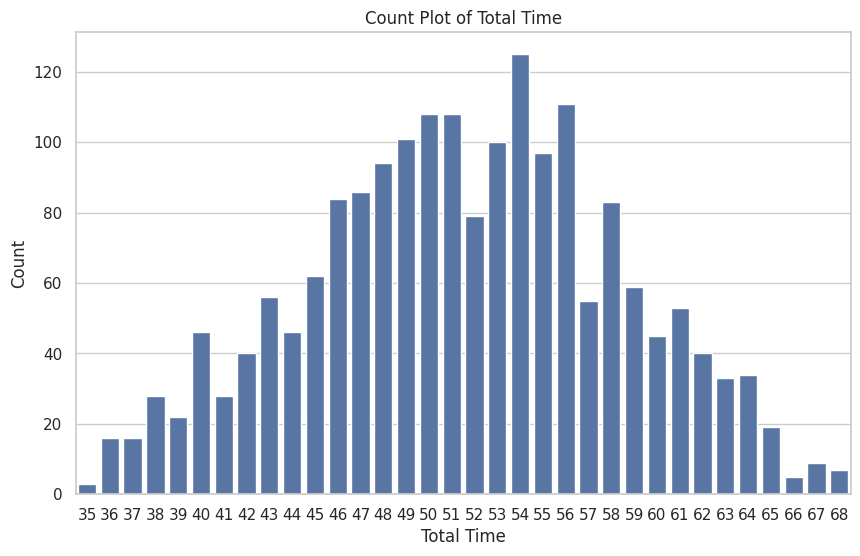

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='total_time', data=df)
plt.title('Count Plot of Total Time')
plt.xlabel('Total Time')
plt.ylabel('Count')
plt.show()

#### Observation on Total Time(delivery time + preparation time)

*   The majority of orders are prepared and delivered within the time range of 46 minutes to 59 minutes.
*   Notably, over 120 orders have been both prepared and delivered within 54 minutes.




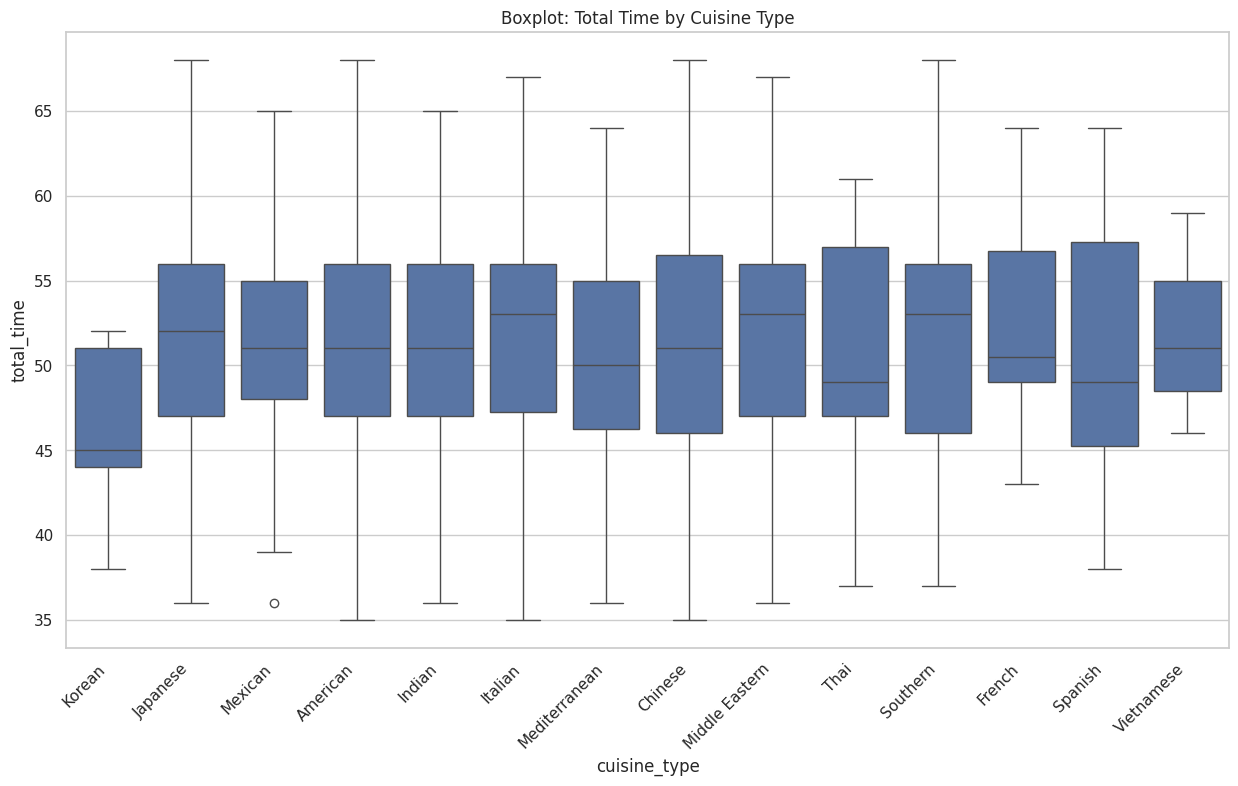

In [38]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='cuisine_type', y='total_time', data=df)
plt.title("Boxplot: Total Time by Cuisine Type")
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observation on total time vs cuisine type



*   The minimum time required for the preparation and delivery of food for all cuisine types is more than 35 minutes, indicating that no cuisine is prepared and delivered in under 35 minutes.
*   Additionally, there is an outlier in Mexican cuisine, suggesting an exceptional case in terms of preparation and delivery time.



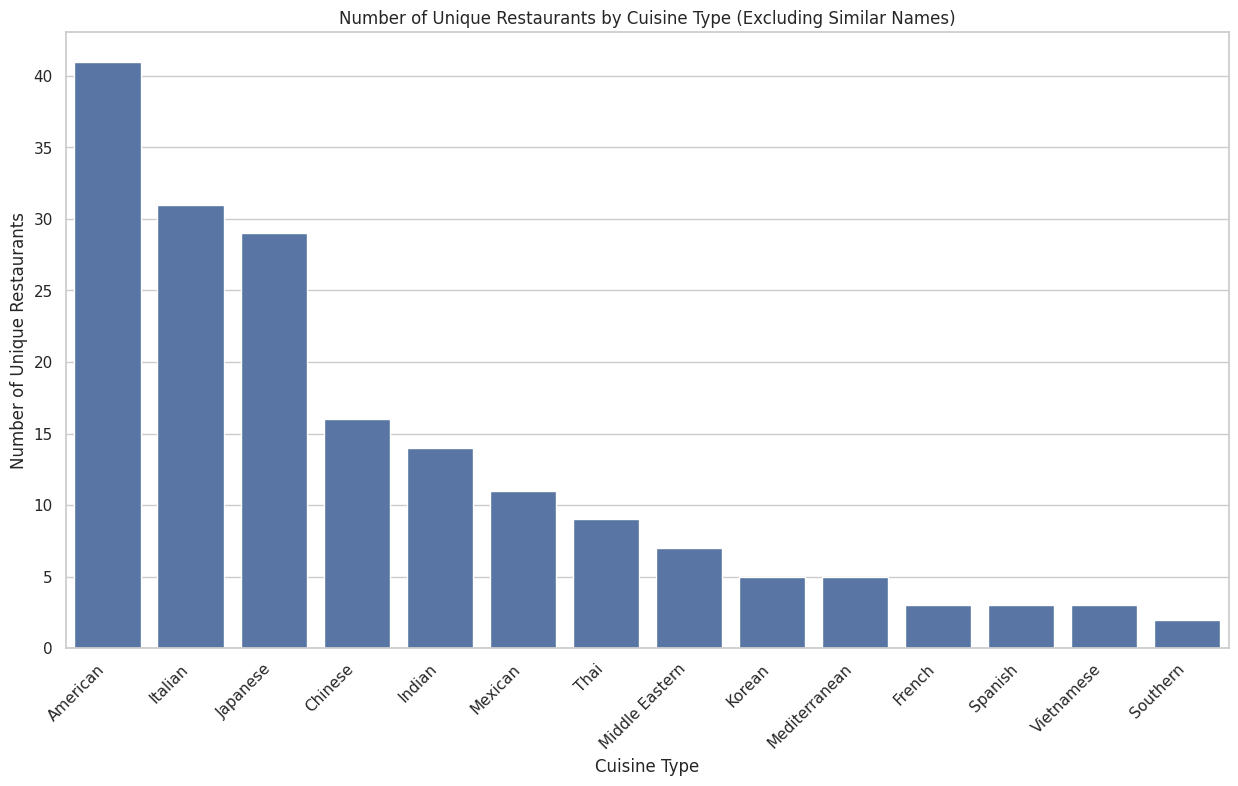

In [39]:
unique_restaurants_df = df.drop_duplicates(subset=['cuisine_type', 'restaurant_name'])
# Count the number of unique restaurants for each cuisine type
restaurant_counts_by_cuisine = unique_restaurants_df['cuisine_type'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=restaurant_counts_by_cuisine.index, y=restaurant_counts_by_cuisine.values)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Unique Restaurants')
plt.title('Number of Unique Restaurants by Cuisine Type (Excluding Similar Names)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observation on Number of restaurants vs Cuisine type

*   American cuisine has the most number of restaurants in New York
*   Following in descending order are Italian, Japanese, and Chinese cuisines.



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


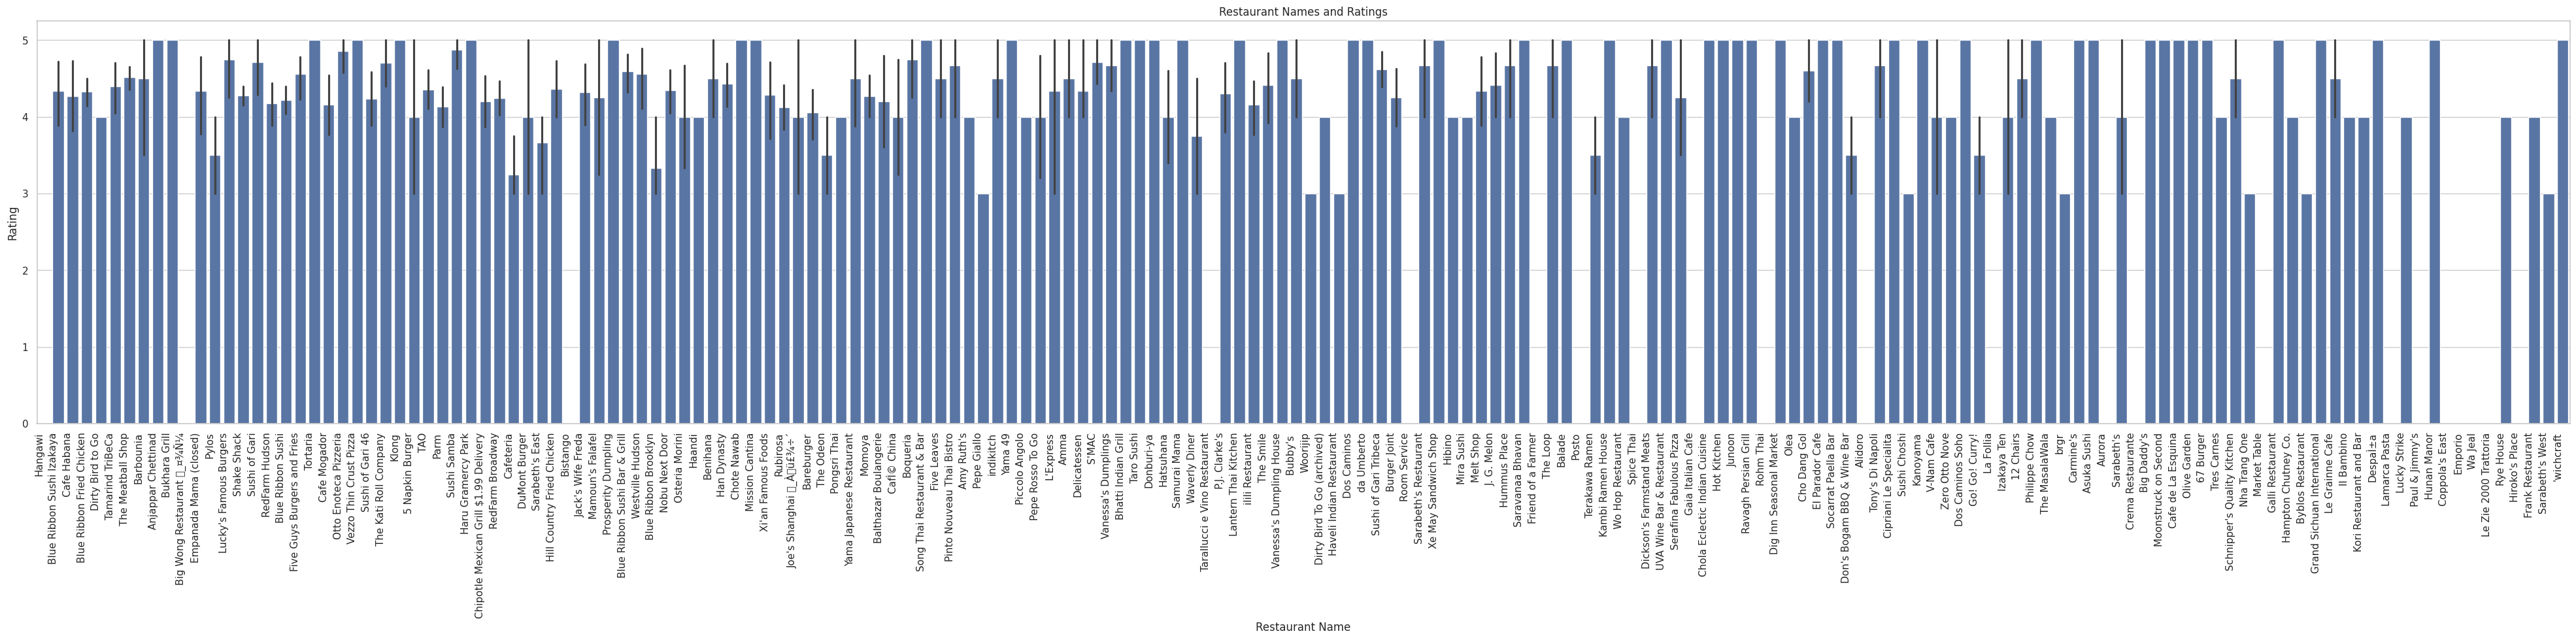

In [40]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')#changing "rating" column into a numerical column
plt.figure(figsize=(50, 8))
sns.barplot(x='restaurant_name', y='rating', data=df)
plt.title('Restaurant Names and Ratings')
plt.xlabel('Restaurant Name')
plt.ylabel('Rating')
plt.xticks(rotation=90, ha='right')
plt.show()

#### Observation on Average rating vs cuisine type

*   The average rating for the majority of restaurants is consistently above 4, indicating a generally high level of satisfaction.
* Nevertheless, there are a few restaurants with average ratings close to 3, suggesting some variation in customer satisfaction levels.




In [41]:
average_ratings = df.groupby('restaurant_name')['rating'].mean()

# Select the top 10 restaurants with the lowest average rating
top_10_lowest_ratings = average_ratings.nsmallest(10)

# Display the top 10 restaurants with the lowest average rating
print("Top 10 Restaurants with the Lowest Average Rating:")
print(top_10_lowest_ratings)

Top 10 Restaurants with the Lowest Average Rating:
restaurant_name
Byblos Restaurant           3.000000
Haveli Indian Restaurant    3.000000
Nha Trang One               3.000000
Pepe Giallo                 3.000000
Sarabeth's West             3.000000
Sushi Choshi                3.000000
Woorijip                    3.000000
brgr                        3.000000
Cafeteria                   3.250000
Blue Ribbon Brooklyn        3.333333
Name: rating, dtype: float64


#### Observation on top 10 restaurants with lowest average rating
Top 10 Restaurants with the Lowest Average Rating:
restaurant_name
*   Byblos Restaurant                3.0
*   Haveli Indian Restaurant         3.0
*   Nha Trang One                    3.0
*   Pepe Giallo                      3.0
*   Sarabeth's West                  3.0
*   Sushi Choshi                     3.0
*   Woorijip                         3.0
*   brgr                             3.0
*   Blue Ribbon Brooklyn        3.333333








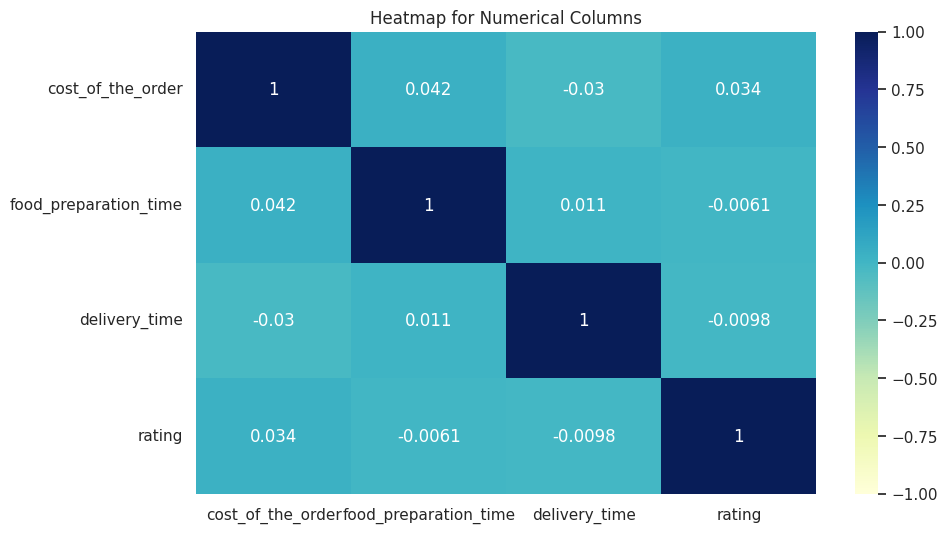

In [42]:
numerical_columns1 = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', "rating"]
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns1].corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Heatmap for Numerical Columns')
plt.show()

#### Observation on heatmap of numerical columns

*   There is a lack of significant positive correlation observed among the numerical columns.




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:

*   Shake Shack has the highest number of ratings as one of the plot above shows and it has an average rating of 4.27
*   The Meatball Shop holds the second place in number of ratings with 4.5 as an average ratingwhich is the highest among these restaurants.
*   Blue Ribbon Fried Chicken & Blue Ribbon Sushi
*   Overall, there are 4 restaurants that fit the condition for promotional offer








### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [44]:
df['revenue'] = 0.25 * (df['cost_of_the_order'] > 20) * df['cost_of_the_order'] + \
                 0.15 * ((df['cost_of_the_order'] <= 20) & (df['cost_of_the_order'] > 5)) * df['cost_of_the_order']
net_revenue = df['revenue'].sum()
print("Net Revenue Generated by the Company: $", net_revenue)

Net Revenue Generated by the Company: $ 6166.303


#### Observations:

*   The net revenue generated by the company for the orders above 5 Dollars and 20 Dollars is 6166.303 Dollars
*   Orders below 5 Dollars generated no revenue for the company






### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [45]:
percentage_above_60 = (len(df[df['total_time'] > 60]) / len(df)) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

*   Only 10.54% of orders have taken more than 60 minutes to prepare and delliver



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

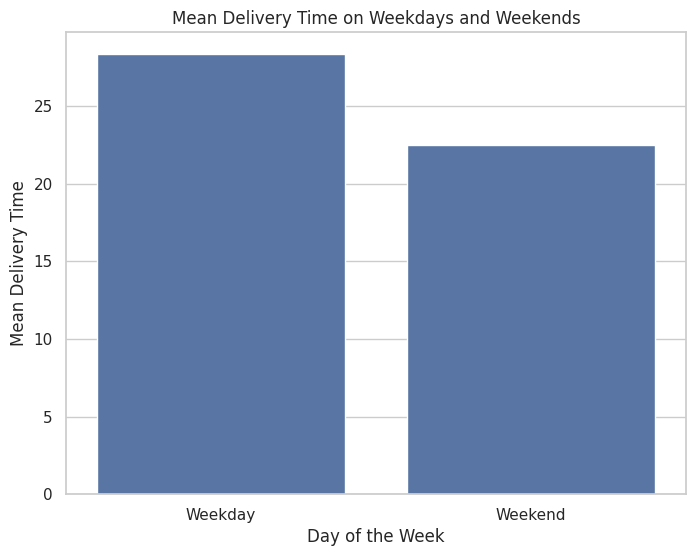

In [46]:
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_delivery_time.index, y=mean_delivery_time.values)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time')
plt.title('Mean Delivery Time on Weekdays and Weekends')
plt.show()

In [47]:
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=['Weekday', 'Weekend'], ordered=True)
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
print("Mean Delivery Time by Day of the Week:")
print(mean_delivery_time_by_day)

Mean Delivery Time by Day of the Week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:



*   The plot indicates that the average food delivery time is higher during weekdays compared to weekends.
*   On weekdays, the average delivery time exceeds 25 minutes, whereas during weekends, it is approximately 7 minutes less. This difference could be attributed to factors such as traffic and peak times during weekdays.
* Orders are delivered more quickly during the weekend, with a mean delivery time of 22.47 minutes, compared to a mean delivery time of 28.34 minutes during weekdays.





### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [48]:
rows_above_60_minutes = df[df['total_time'] > 60]

# Display the ratings for these rows
print("Rows with Total Time Above 60 Minutes and Their Ratings:")
print(rows_above_60_minutes[['total_time', 'rating']])

Rows with Total Time Above 60 Minutes and Their Ratings:
      total_time  rating
7             63     3.0
10            62     NaN
19            61     4.0
24            61     NaN
54            64     3.0
...          ...     ...
1869          61     4.0
1873          63     NaN
1875          65     NaN
1880          62     5.0
1889          63     3.0

[200 rows x 2 columns]


In [49]:
rows_below_20_cost = df[df['cost_of_the_order'] < 20]

# Display the ratings for these rows
print("Rows with Order Cost Below 20 and Their Ratings:")
print(rows_below_20_cost[['cost_of_the_order', 'rating']])

Rows with Order Cost Below 20 and Their Ratings:
      cost_of_the_order  rating
1                 12.08     NaN
2                 12.23     5.0
4                 11.59     4.0
6                  6.07     NaN
7                  5.97     3.0
...                 ...     ...
1890              15.67     5.0
1891               5.82     NaN
1894              12.18     5.0
1896              12.18     5.0
1897              19.45     NaN

[1343 rows x 2 columns]


In [50]:
# Find the top 10 most expensive orders
top_10_expensive_orders = df.nlargest(10, 'cost_of_the_order')
#Displaying rating for those order
print("Top 10 Most Expensive Orders and Their Ratings:")
print(top_10_expensive_orders[['cost_of_the_order', 'rating']])

Top 10 Most Expensive Orders and Their Ratings:
      cost_of_the_order  rating
573               35.41     4.0
1646              34.19     NaN
1762              33.37     3.0
1831              33.37     4.0
1370              33.32     4.0
41                33.22     NaN
1213              33.18     NaN
17                33.03     NaN
61                33.03     NaN
64                33.03     NaN


In [51]:
# Create a new column 'revenue_category' based on the cost_of_the_order
df['revenue_category'] = pd.cut(df['cost_of_the_order'], bins=[5, 20, float('inf')],
                                labels=['$5-$20', 'Over $20'], right=False)

# Define commission rates
commission_rates = {'$5-$20': 0.15, 'Over $20': 0.25}

# Filter out rows with missing 'revenue_category'
df_filtered = df.dropna(subset=['revenue_category']).copy()

# Calculate restaurant revenue and foodhub revenue
df_filtered['restaurant_revenue'] = df_filtered.apply(lambda row: row['cost_of_the_order'] * (1 - commission_rates[row['revenue_category']]), axis=1)
df_filtered['foodhub_revenue'] = df_filtered['cost_of_the_order'] - df_filtered['restaurant_revenue']

# Group by 'cuisine_type' and 'revenue_category' and calculate the total foodhub revenue
revenue_by_cuisine = df_filtered.groupby(['cuisine_type', 'revenue_category'])['foodhub_revenue'].sum().unstack()

# Calculate the total foodhub revenue for each cuisine type
revenue_by_cuisine['Total Foodhub Revenue in $'] = revenue_by_cuisine.sum(axis=1)

# Present the results as a DataFrame
result_df = pd.DataFrame(revenue_by_cuisine.to_records())
result_df.columns = [col.replace("('", "").replace("', '", "_").replace("')", "") for col in result_df.columns]
result_df

,cuisine_type,$5-$20,Over $20,Total Foodhub Revenue in $
0,American,751.2840,1126.9900,1878.2740
1,Chinese,277.7655,412.2750,690.0405
2,French,19.3200,56.8725,76.1925
3,Indian,92.6865,154.3075,246.9940
4,Italian,384.4620,582.4225,966.8845
5,Japanese,649.2270,829.0175,1478.2445
6,Korean,18.3030,15.0000,33.3030
7,Mediterranean,62.4480,73.8800,136.3280
8,Mexican,102.0855,154.6075,256.6930
9,Middle Eastern,55.4985,138.0550,193.5535


### Conclusions:

*  Cuisine Popularity: The most popular cuisine types in the dataset are American, Japanese, and Italian. American cuisine has the highest number of restaurants, followed by Indian and Japanese cuisines.
*   Average Ratings: The average ratings vary across different cuisines, with some cuisines receiving more ratings than others due to high number of orders.
*   Delivery Times: The analysis of food preparation and delivery times reveals variations among different restaurants.Longer food preparation or delivery times might impact customer satisfaction, and addressing these issues could improve overall service quality.
*   Customer Preferences: Identifying the top-rated restaurants and cuisines can help tailor marketing strategies to meet customer preferences. Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop are the top-rated restaurants.
* There is a higher volume of orders during weekends compared to weekdays.
*   Quality Control: Restaurants with lower average ratings may need closer attention to improve their offerings, service, or other aspects affecting customer satisfaction. Below is a list of them.
Byblos Restaurant                
Haveli Indian Restaurant         
Nha Trang One                    
Pepe Giallo                      
Sarabeth's West                  
Sushi Choshi                     
Woorijip                         
brgr                             
Blue Ribbon Brooklyn
* The data suggests that food preparation times are nearly equal during weekdays and weekends. However, delivery times tend to be longer during weekdays compared to weekends.
* The analysis suggests opportunities to explore and diversify the types of cuisines offered, especially if there are emerging trends or cuisines with growth potential. Some cuisine types have the potential to grow more, such as Chinese or Mexican.
* American and Japanese cuisines are the only two with revenue for FoodHub exceeding 1000 dollars.
* Additionally, the data reveals that restaurants have received 5-star ratings even when the total time exceeds 60 minutes.
* Moreover, restaurants with costs under 20 dollars have also received 5-star reviews. However, further analysis is recommended with additional data to draw more comprehensive conclusions.








### Recommendations:

*  Focus on Customer Favorites: Identify the cuisines and restaurants with the highest average ratings. Consider promoting these popular options to attract more customers. The top 5 restaurants have already been identified in question 13.
*   Address Low-Rated Restaurants: Investigate the restaurants with the lowest average ratings. Understand customer feedback and consider working with these establishments to improve their service, food quality, or other aspects. A graph has been plotted and 10 least favourite restaurant have been identified.
*   Explore Cuisine Trends: Analyze the distribution of cuisine types and identify any emerging trends. This could guide decisions on menu additions or modifications to align with customer preferences. The top 4 cuisine are American, Japanes, Italian and Chinese.
*   Optimize Delivery Times: Evaluate the average food preparation and delivery times. If certain restaurants consistently have longer delivery times, work with them to improve efficiency and enhance the overall customer experience.
*   Customer Engagement: Encourage customer feedback and engagement. Provide incentives for leaving reviews and ratings. This can help in obtaining more data for analysis and improve overall customer satisfaction.
*   Marketing Strategies: Use the information on popular cuisines and well-rated restaurants to develop targeted marketing strategies. Highlight customer reviews, ratings, and any unique features of these establishments in your promotions.






